In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context("poster")
sns.set(rc={"figure.figsize": (11.7,8.27)})
sns.set_style("whitegrid")
%matplotlib inline

# MAGNESIUM

China produces around 85% of the world’s magnesium. In 2020 that amounted to 961,000 tonnes, mostly from Yulin, in northern Shaanxi province. The energy cost of production is high: about 4kg of coal is needed to produce 1kg of magnesium. In September officials in Yulin told at least 40 producers to either shut down or reduce their output to cut emissions and meet energy-consumption targets.

It is very energy intensive, requiring 80 kWh of energy to produce 1 kg of magnesium at temperatures of up to 1,200oC. 

The biggest Magnesium producer is China, accounting for about 87% of the total production. Magnesium is a critical material for hardening aluminum alloys and is used in everything from power tools to laptops. Major consumers are China (39%), followed by Europe and North America (each around 19%) and Japan (4%).

END USE

In [57]:
end_use_2005 = pd.read_csv('data/Magnesium/Magnesium_end_use_2005.csv')
print(end_use_2005.shape)

end_use_2005.tail()

(29, 10)


,Year,Cans and containers,Chemicals,Iron and steel desulfurization,Iron and steel foundries,Machinery,Nonferrous metal production,Transportation,Other,Apparent consumption
24,1999,43.0,1.0,17.0,3.0,23.0,1.0,70.0,21.0,179.0
25,2000,37.0,1.0,22.0,3.0,25.0,2.0,53.0,17.0,160.0
26,2001,30.0,1.0,16.0,3.0,20.0,1.0,38.0,11.0,120.0
27,2002,26.0,1.0,14.0,4.0,17.0,2.0,34.0,12.0,110.0
28,2003,25.0,1.0,15.0,4.0,23.0,2.0,40.0,10.0,120.0


In [142]:
end_use_2005.to_excel('/mnt/c/Users/Palmira/Desktop/Ironhack/final_project/data/Magnesium/end_use_2005.xls', index=False)

Price in market (last years, the china market)

In [394]:
magn_price_china = pd.read_csv('data/Magnesium/Magn_price_china.csv')
print(magn_price_china.shape)
#CYN commodity
magn_price_china.head()

(1155, 7)


,Fecha,Último,Apertura,Máximo,Mínimo,Vol.,% var.
0,03.03.2022,"42.500,00","42.500,00","43.000,00","42.000,00",-,"-1,16%"
1,02.03.2022,"43.000,00","43.000,00","43.500,00","42.500,00",-,"-2,27%"
2,01.03.2022,"44.000,00","44.000,00","44.500,00","43.500,00",-,"-2,22%"
3,28.02.2022,"45.000,00","45.000,00","45.500,00","44.500,00",-,"-1,10%"
4,25.02.2022,"45.500,00","45.500,00","46.000,00","45.000,00",-,"2,25%"


In [395]:
magn_price_china['Year'] = pd.to_datetime(magn_price_china['Fecha']).dt.year

In [396]:
magn_price_china['Month'] = pd.to_datetime(magn_price_china['Fecha']).dt.month

In [397]:
magn_price_china['price_CNY'] = magn_price_china['Último']

In [398]:
magn_price_china.columns

Index(['Fecha', 'Último', 'Apertura', 'Máximo', 'Mínimo', 'Vol.', '% var.',
       'Year', 'Month', 'price_CNY'],
      dtype='object')

In [399]:
magn_price_china.drop(axis=0, index=None, columns = ['Último', 'Apertura', 'Máximo', 'Mínimo', 'Vol.', '% var.',
       'Year', 'Month'],inplace=True)

In [400]:
magn_price_china.rename(columns={'Fecha':'Year'}, inplace=True)

In [401]:
magn_price_china['Price_CNY'] = magn_price_china.price_CNY.str.replace(',00','')
magn_price_china['Price_CNY'] = magn_price_china.price_CNY.str.replace(',00','')
magn_price_china.head()

,Year,price_CNY,Price_CNY
0,03.03.2022,"42.500,00",42.500
1,02.03.2022,"43.000,00",43.000
2,01.03.2022,"44.000,00",44.000
3,28.02.2022,"45.000,00",45.000
4,25.02.2022,"45.500,00",45.500


In [402]:
magn_price_china['price_CNY'] = magn_price_china.Price_CNY.str.replace('.','')

In [404]:
magn_price_china.drop(axis=0, index=None, columns = ['Price_CNY'],inplace=True)
magn_price_china.head()

,Year,price_CNY
0,03.03.2022,42500
1,02.03.2022,43000
2,01.03.2022,44000
3,28.02.2022,45000
4,25.02.2022,45500


In [408]:
#magn_price_china.price_CNY.astype(int)

In [417]:
magn_china = magn_price_china.reindex(index=magn_price_china.index[::-1])
magn_china

,Year,price_CNY
1154,10.05.2017,14550
1153,11.05.2017,14550
1152,12.05.2017,14500
1151,15.05.2017,14500
1150,16.05.2017,14500
...,...,...
4,25.02.2022,45500
3,28.02.2022,45000
2,01.03.2022,44000
1,02.03.2022,43000


In [425]:
magn_price_all = pd.concat([magn_price, magn_china])

In [426]:
magn_price_china['Price_CNY'] = magn_price_china.price_CNY.str.replace(',00','')

,Year,price_CNY
0,1915,70086.2
1,1916,57545.9
2,1917,28146
3,1918,25219.9
4,1919,25498.6
...,...,...
4,25.02.2022,45500
3,28.02.2022,45000
2,01.03.2022,44000
1,02.03.2022,43000


In [427]:
magn_price_all.to_excel('/mnt/c/Users/Palmira/Desktop/Ironhack/final_project/data/Magnesium/magn_price_all.xls', index=False)

In [233]:
magn_price = pd.read_csv('data/Magnesium/Magnesium_price.csv')
print(magn_price.shape)
# dollars per pound  ( 1pound = 0,000453592 Tonnes)
# dollar to CNY ()  1 dollar per tonnes = 13 933.6419 Chinese yuan per tonnes
magn_price

(96, 2)


,Year,Price
0,1915,5.03
1,1916,4.13
2,1917,2.02
3,1918,1.81
4,1919,1.83
...,...,...
91,2006,1.40
92,2007,2.25
93,2008,3.15
94,2009,2.30


In [239]:
magn_price['price_CNY'] = magn_price['Price'] * 13933.64

In [423]:
magn_price.drop(axis=0, index=None, columns = ['Price'],inplace=True)

In [430]:
magn_price

AttributeError: 'DataFrame' object has no attribute 'to_datetime'

In [301]:
magn_price.to_excel('/mnt/c/Users/Palmira/Desktop/Ironhack/final_project/data/Magnesium/magn_price_1915.xls', index=False)

In [160]:
#Datos historicos de CNY to Dollar 
CNY_DOLLAR = pd.read_csv('data/Magnesium/Datos históricos CNY_USD.csv')
print(CNY_DOLLAR.shape)
#1 yuan is 0.16  (Google March 2022)
# 1 Chinese yuan per tonnes = 7.17687456 × 10-5 U.S. dollars per pound
CNY_DOLLAR['dollars']

(4922, 6)


,Fecha,Último,Apertura,Máximo,Mínimo,% var.
0,04.03.2022,0.1582,0.1582,0.1584,0.1581,0.00%
1,03.03.2022,0.1582,0.1583,0.1584,0.1582,0.00%
2,02.03.2022,0.1582,0.1584,0.1585,0.1582,-0.13%
3,01.03.2022,0.1584,0.1586,0.1586,0.1583,-0.04%
4,28.02.2022,0.1585,0.1582,0.1586,0.1582,0.13%
...,...,...,...,...,...,...
4917,13.02.1992,5.4700,5.4700,5.4700,5.4700,0.06%
4918,12.02.1992,5.4665,5.4665,5.4665,5.4665,0.17%
4919,11.02.1992,5.4573,5.4573,5.4573,5.4573,0.17%
4920,10.02.1992,5.4480,5.4480,5.4480,5.4480,-0.13%


In [161]:
# gather by year 
CNY_DOLLAR['yyyy'] = pd.to_datetime(CNY_DOLLAR['Fecha']).dt.year

CNY_DOLLAR.rename(columns={'yyyy':'Year'}, inplace=True)

CNY_DOLLAR = CNY_DOLLAR.groupby('Year').mean()

In [232]:
CNY_DOLLAR

,Último,Apertura,Máximo,Mínimo
Year,,,,
1992,5.522997,5.522997,5.522997,5.522997
1993,0.173736,0.173736,0.173736,0.173736
1994,0.114884,0.114884,0.114884,0.114884
2002,0.120800,0.120800,0.120800,0.120800
2003,0.120800,0.120800,0.120800,0.120800
2004,0.120800,0.120800,0.120800,0.120800
2005,0.123698,0.123985,0.123996,0.123939
2006,0.125435,0.125478,0.125518,0.125430
2007,0.131505,0.131515,0.131595,0.131452


IMPORT & EXPORT TABLES

In [62]:
n = ['2002', '2003']
years = [i for i in range(2007,2020,2)]
years2 = [str(i) for i in range(2007,2020,2)]
years_dict = dict(zip(years, years2))

In [63]:
print(years_dict)

{2007: '2007', 2009: '2009', 2011: '2011', 2013: '2013', 2015: '2015', 2017: '2017', 2019: '2019'}


In [ ]:
magn_table1[y] = pd.read_excel(f'mag_salient_{y}_table1.csv')

In [89]:
years = [str(i) for i in range(2007,2018,2)]
years

['2007', '2009', '2011', '2013', '2015', '2017']

In [90]:
magn_table3 = {}
for y in years:
    magn_table3[y] = pd.read_excel(f'data/Magnesium/myb1-{y}-mgmet.xls', sheet_name='T3',skiprows=5)

In [99]:
use = {'For structural products': ['Die', 'Permanent mold', 'Sand', 'Wrought products2'],  
       'For distributive or sacrificial purposes' : ['Aluminum alloys',
       'Cathodic protection (anodes)', 'Iron and steel desulfurization',
       'Nodular iron',
       'Reducing agent for titanium, zirconium, hafnium, uranium, beryllium',
       'Other3']}

In [120]:
columns = []
for y in years:
    columns.append(magn_table3[y].columns)

In [180]:
magn_table3['2009']

,Use,2008,2009
0,Die,16200.0,19100.0
1,Permanent mold,19.0,44.0
2,Sand,428.0,410.0
3,Wrought products2,2480.0,1160.0
4,Total,19100.0,20700.0
5,Aluminum alloys,35000.0,23000.0
6,Cathodic protection (anodes),824.0,686.0
7,Iron and steel desulfurization,7070.0,3970.0
8,Nodular iron,61.0,72.0
9,"Reducing agent for titanium, zirconium, hafniu...",1320.0,1120.0


In [119]:
for i in years:
    magn_table3[i].drop(axis=0, index=None, columns = ["Unnamed: 1",'Unnamed: 3'], inplace=True)

In [124]:
for i in years:
    magn_table3[i].dropna(inplace=True)
    magn_table3[i].reset_index(drop=True, inplace=True)

In [175]:
magn_table3['2009']

,Use,2008,2009
0,Die,16200.0,19100.0
1,Permanent mold,19.0,44.0
2,Sand,428.0,410.0
3,Wrought products2,2480.0,1160.0
4,Total,19100.0,20700.0
5,Aluminum alloys,35000.0,23000.0
6,Cathodic protection (anodes),824.0,686.0
7,Iron and steel desulfurization,7070.0,3970.0
8,Nodular iron,61.0,72.0
9,"Reducing agent for titanium, zirconium, hafniu...",1320.0,1120.0


In [178]:
magn_use = magn_table3['2007']

In [215]:
#Added the magn_use column to the datafram
#magn_use['2017'] = magn_table3['2017']['2017']

In [221]:
magn_table3_2019 = pd.read_excel(f'data/Magnesium/myb1-2019-mgmet.xlsx', sheet_name='T3',skiprows=5)

In [223]:
magn_table3_2019.drop(axis=0, index=None, columns = ["Unnamed: 1",'Unnamed: 3'], inplace=True)

In [225]:
magn_table3_2019.dropna(inplace=True)
magn_table3_2019.reset_index(drop=True, inplace=True)


,Use,2018,2019
0,Die,23100,23000
1,Permanent mold,563,540
2,Sand,1430,1450
3,Wrought products2,W,W
4,Other,206,206
5,Total,25300,25200
6,Aluminum alloys,15100,16400
7,Cathodic protection (anodes),W,W
8,Iron and steel desulfurization,7170,7170
9,Nodular iron,518,474


In [253]:
magn_table3_2005 = pd.read_excel(f'data/Magnesium/myb1-2005-mgmet.xls', sheet_name='T3',skiprows=5)

In [255]:
magn_table3_2005.drop(axis=0, index=None, columns = ["Unnamed: 1",'Unnamed: 3'], inplace=True)

In [256]:
magn_table3_2005.dropna(inplace=True)
magn_table3_2005.reset_index(drop=True, inplace=True)

In [309]:
magn_table3_2002 = pd.read_excel(f'data/Magnesium/myb1-2002-mgmet.xls', sheet_name='Table03',skiprows=5)

In [310]:
magn_table3_2002.drop(axis=0, index=None, columns = ["Unnamed: 1",'Unnamed: 3'], inplace=True)
magn_table3_2002.dropna(inplace=True)
magn_table3_2002.reset_index(drop=True, inplace=True)

In [314]:
magn_use.drop(axis=0, index=None, columns = ["Use"], inplace=True)

In [315]:
magn_use_all = pd.concat([magn_table3_2002, magn_use], axis=1)

In [318]:
magn_use_all.columns

Index([ 'Use',   2001,   2002,   2006,   2007, '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019'],
      dtype='object')

In [321]:
W_use = ['2016', '2017', '2018', '2019']
for y in W_use:
    magn_use_all[y].replace(["W"], 0,inplace = True)

In [324]:
magn_use_all

,Use,2001,2002,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Die,42900,45600,25600.0,23100.0,16200.0,19100.0,19600.0,22500.0,10100.0,9850.0,8700.0,8020.0,28000,26700,23100,23000
1,Permanent mold,1280,270,50.0,29.0,19.0,44.0,163.0,336.0,186.0,296.0,278.0,291.0,419,424,563,540
2,Sand,532,492,357.0,2800.0,428.0,410.0,424.0,498.0,475.0,683.0,660.0,635.0,1320,1370,1430,1450
3,Wrought products2,3280,1940,2410.0,2720.0,2480.0,1160.0,2120.0,3580.0,1920.0,2240.0,2340.0,1920.0,0,0,0,0
4,Total,48000,48300,28400.0,28700.0,19100.0,20700.0,22300.0,26900.0,12700.0,13100.0,12000.0,10900.0,1870,769,206,206
5,Aluminum alloys,35000,34900,33700.0,29800.0,35000.0,23000.0,23800.0,22500.0,23500.0,24400.0,22600.0,21500.0,31600,29300,25300,25200
6,Cathodic protection (anodes),104,104,3000.0,916.0,824.0,686.0,709.0,876.0,921.0,1090.0,1010.0,1030.0,13000,15300,15100,16400
7,Chemicals,W,W,7570.0,9290.0,7070.0,3970.0,5960.0,6430.0,8120.0,8170.0,7800.0,7300.0,0,0,0,0
8,Iron and steel desulfurization,8150,8510,323.0,304.0,61.0,72.0,412.0,457.0,472.0,626.0,627.0,491.0,7270,7120,7170,7170
9,beryllium,1040,867,869.0,1280.0,1320.0,1120.0,882.0,399.0,24100.0,19300.0,19900.0,22300.0,305,439,518,474


In [325]:
magn_use_all.to_excel('/mnt/c/Users/Palmira/Desktop/Ironhack/final_project/data/Magnesium/magn_use_all.xls', index=False)

In [290]:
magn_table1_2021 = pd.read_csv(f'data/Magnesium/2021_1q_imp_exp.csv')

In [291]:
magn_table1_2021.rename(columns={'Unnamed 1':'2020','2020':'January','January':'February', 'February':'March'}, inplace=True)

In [292]:
magn_table1_2021.drop(axis=0, index=None, columns = ["Unnamed: 1"], inplace=True)

In [298]:
magn_table1_2021.dropna(axis=1)

,Use,January,February,March,April,May,June
0,Imports\tMetal,2.13,1.18,1.18,1.190,936.00,825.00
1,Imports\tWaste and scrap,2.02,1.96,1.90,1.490,1.00,1.45
2,Imports\tAlloys (magnesium content),1.43,603.00,1.28,1.190,1.17,1.21
3,Imports\tSheet/tubing/ribbons/wire/powder/and ...,232.00,254.00,199.00,484,218.00,373.00
4,Imports\tTotal,5.82,4.00,4.56,4.360,3.32,3.87
5,Exports Metal,100.00,67.00,71.00,109,87.00,424.00
6,Exports Waste and scrap,209.00,119.00,152.00,121,180.00,136.00
7,Exports Alloys (gross weight),209.00,177.00,228.00,--,21.00,48.00
8,Exports Sheet/tubing/ribbons/wire/powder/and o...,95.00,89.00,207.00,221,251.00,323.00
9,Exports Total,612.00,451.00,658.00,451,539.00,930.00


In [294]:
magn_table1_2021_2 = pd.read_csv(f'data/Magnesium/2021_2q_imp_exp.csv')

In [299]:
magn_table1_2021_3 = pd.read_csv(f'data/Magnesium/2021_3q_imp_exp.csv')
magn_table1_2021_4 = pd.read_csv(f'data/Magnesium/2021_4q_imp_exp.csv')

In [ ]:
magn_table1_2021_3

In [295]:
magn_table1_2021_2

,Use,April,May,June
0,Imports Metal,1.190,936.00,825.00
1,Imports Waste and scrap,1.490,1.00,1.45
2,Imports Alloys (magnesium content),1.190,1.17,1.21
3,Imports Sheet/tubing/ribbons/wire/powder/and o...,484,218.00,373.00
4,Imports Total,4.360,3.32,3.87
5,Exports Metal,109,87.00,424.00
6,Exports Waste and scrap,121,180.00,136.00
7,Exports Alloys (gross weight),--,21.00,48.00
8,Exports Sheet/tubing/ribbons/wire/powder/and o...,221,251.00,323.00
9,Exports Total,451,539.00,930.00


In [296]:
month = ['April', 'May', 'June']
for y in month:
    magn_table1_2021[y] = magn_table1_2021_2[y]

In [297]:
magn_table1_2021

,Use,January,February,March,March,April,May,June
0,Imports\tMetal,2.13,1.18,1.18,NaN,1.190,936.00,825.00
1,Imports\tWaste and scrap,2.02,1.96,1.90,NaN,1.490,1.00,1.45
2,Imports\tAlloys (magnesium content),1.43,603.00,1.28,NaN,1.190,1.17,1.21
3,Imports\tSheet/tubing/ribbons/wire/powder/and ...,232.00,254.00,199.00,NaN,484,218.00,373.00
4,Imports\tTotal,5.82,4.00,4.56,NaN,4.360,3.32,3.87
5,Exports Metal,100.00,67.00,71.00,NaN,109,87.00,424.00
6,Exports Waste and scrap,209.00,119.00,152.00,NaN,121,180.00,136.00
7,Exports Alloys (gross weight),209.00,177.00,228.00,NaN,--,21.00,48.00
8,Exports Sheet/tubing/ribbons/wire/powder/and o...,95.00,89.00,207.00,NaN,221,251.00,323.00
9,Exports Total,612.00,451.00,658.00,NaN,451,539.00,930.00


### Scrapping web

In [75]:
from webdriver_manager.chrome import ChromeDriverManager
import requests as req
from bs4 import BeautifulSoup as bs
import pandas as pd
import selenium
import json 
from selenium import webdriver
import os
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
import time
import regex as re

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from unicodedata import normalize

url = ('https://wits.worldbank.org/trade/comtrade/en/country/ALL/year/2019/tradeflow/Imports/partner/WLD/product/810411#')

In [77]:
#No puedo scrapear porque necesito autorizacion

## Wit to dataframe

In [78]:
years = [i for i in range(2000,2019)]
print(years)

[2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]


In [79]:
years= [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018]
magn_wit_imp = {}
magn_wit_exp = {}
for y in years:
    magn_wit_exp[y] = pd.read_excel(f'data/Magnesium/WITS-By-{y}-Exp.xlsx', sheet_name= 'By-HS6Product')
    magn_wit_imp[y] = pd.read_excel(f'data/Magnesium/WITS-By-{y}-Imp.xlsx', sheet_name='By-HS6Product')
    

In [80]:
df_magn_wit = pd.DataFrame()
for y in years:
    df_magn_wit = pd.concat([df_magn_wit,magn_wit_exp[y]], ignore_index=True)
    df_magn_wit = pd.concat([df_magn_wit,magn_wit_imp[y]], ignore_index=True)

In [81]:
df_magn_wit

,Reporter,TradeFlow,ProductCode,Product Description,Year,Partner,Trade Value 1000USD,Quantity,Quantity Unit
0,China,Export,810411,"Magnesium; unwrought, containing at least 99.8...",2000,World,141121.27,9.498630e+07,Kg
1,Israel,Export,810411,"Magnesium; unwrought, containing at least 99.8...",2000,World,47529.00,1.853200e+07,Kg
2,Russian Federation,Export,810411,"Magnesium; unwrought, containing at least 99.8...",2000,World,42914.54,2.072670e+07,Kg
3,Canada,Export,810411,"Magnesium; unwrought, containing at least 99.8...",2000,World,24903.43,8.918810e+06,Kg
4,United States,Export,810411,"Magnesium; unwrought, containing at least 99.8...",2000,World,20744.45,1.021120e+07,Kg
...,...,...,...,...,...,...,...,...,...
2303,Cambodia,Import,810411,"Magnesium; unwrought, containing at least 99.8...",2018,World,0.04,1.628700e+01,Kg
2304,Jamaica,Import,810411,"Magnesium; unwrought, containing at least 99.8...",2018,World,0.04,5.940000e+00,Kg
2305,Madagascar,Import,810411,"Magnesium; unwrought, containing at least 99.8...",2018,World,0.02,3.700000e-01,Kg
2306,Maldives,Import,810411,"Magnesium; unwrought, containing at least 99.8...",2018,World,0.01,4.150570e+00,Kg


In [82]:
df_magn_wit.to_excel('/mnt/c/Users/Palmira/Desktop/Ironhack/final_project/data/Magnesium/magnesium_wit.xls', index=False)

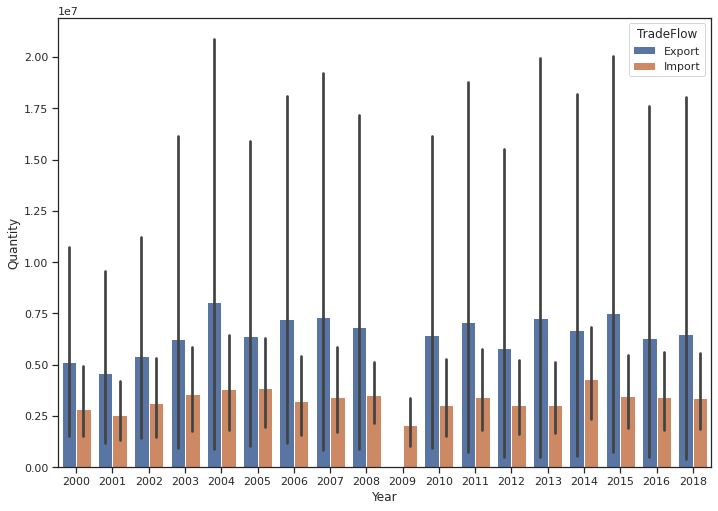

In [83]:
# plot
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.barplot(x=df_magn_wit.Year, y=df_magn_wit.Quantity, hue=df_magn_wit.TradeFlow);

CO2 EMission, trying to see the trend in china of lowering down their emissions

In [132]:
CO2_emissions = pd.read_csv('data/CO2_emissions_carbon_atlas.csv')   ## CO2 emissions (metric tons per capita)
print(CO2_emissions.shape)

CO2_emissions.set_index('Unnamed: 0')

(61, 222)


,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,Aruba,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Wallis and Futuna Islands,Western Sahara,Yemen,Zambia,Zimbabwe
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
1960,0.41388,2.0225,6.1512,NaN,0.54895,NaN,0.036640,48.7645,3.2769,0.61856,...,4.3145,38.1771,NaN,57.0168,7.4839,NaN,NaN,3.6310,4.3553,5.9431
1961,0.49080,2.2790,6.0559,NaN,0.45371,NaN,0.047632,51.1267,3.3832,0.64555,...,4.1168,39.4918,NaN,51.8798,7.9783,NaN,NaN,2.6637,3.7090,5.0613
1962,0.68859,2.4622,5.6610,NaN,1.17910,NaN,0.102590,53.6401,3.5561,0.70894,...,4.0069,41.5808,0.040304,54.0561,9.3377,NaN,NaN,3.8838,3.5827,4.8890
1963,0.70674,2.0812,5.4192,NaN,1.14970,NaN,0.084272,50.0327,3.8185,0.67909,...,4.3148,44.7345,0.032976,56.1517,9.1104,NaN,NaN,2.9165,3.4445,4.7004
1964,0.83855,2.0152,5.6430,NaN,1.22290,NaN,0.091600,55.6700,4.0651,0.66028,...,4.5527,47.7096,0.062288,56.5500,11.7878,NaN,NaN,3.6310,3.2750,4.4691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,6.74460,4.4921,148.9287,0.46899,31.40380,0.15389,0.490980,190.9772,5.2030,0.88302,...,6.5204,108.1687,0.146560,169.4769,192.7656,0.025648,NaN,10.4269,5.6591,10.7376
2017,6.85980,5.3018,154.9356,0.46533,28.42040,0.14290,0.490980,187.8047,5.5366,0.89035,...,6.1626,107.1532,0.139230,161.5355,195.2493,0.025648,NaN,9.9510,6.5172,9.5816
2018,8.34480,4.7339,161.4865,0.49464,24.37580,0.14290,0.498300,181.0996,5.8258,0.87203,...,6.5710,114.7322,0.175870,120.1767,223.7178,0.025648,NaN,9.9837,7.3131,11.8544


In [431]:
CO2_emissionsCO2_emissions.China

0       798.7999
1       570.6302
2       459.6181
3       456.7794
4       460.6371
         ...    
56     9720.4441
57     9920.4592
58    10289.9895
59    10489.9886
60    10667.8875
Name: China, Length: 61, dtype: float64

Recicling

New Projects

CANADA AND US:

The company is currently producing around 250-300 tonnes of magnesium per month and exporting it into the US market, trading house Wogen Resources, its sole distributor in the US, told Fastmarkets.

Alliance Magnesium’s planned production, once up to full speed, will be 1,000 metric tonnes per month, Wogen Resources said.

“They will target the European market at a later stage, possibly when the project goes into phase two of primary production, which moves up to approximately 35,000 tonnes in total,” Wogen Resources told Fastmarkets.

AUSTRALIA:

Latrobe Magnesium (LMG), in Victoria’s Latrobe Valley in Australia, had its feasibility study approved last year. Production will start at 1,000-3,000 tonnes per year in the first quarter of 2023. It will then expand to 10,000 tonnes per year and eventually expand further, Latrobe Magnesium said.

Another project is Korab Resources, which is currently in the permitting process for extracting magnesium deposits in Winchester Australia. 
The company announced in November an agreement with the Port of Darwin to export 30,000 tonnes of magnesium metal per year.